<a href="https://colab.research.google.com/github/deepanrajm/machine_learning/blob/master/Regression/Car_Price_Prediction_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/deepanrajm/machine_learning.git

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# reading the dataset
cars = pd.read_csv("/content/sample_data/CarPrice_Assignment.csv")
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

,count
symboling,
0,67
1,54
2,32
3,27
-1,22
-2,3


In [ ]:
# aspiration: An (internal combustion) engine property showing
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

,count
aspiration,
std,168
turbo,37


In [ ]:
# drivewheel: frontwheel, rarewheel or four-wheel drive
cars['drivewheel'].astype('category').value_counts()

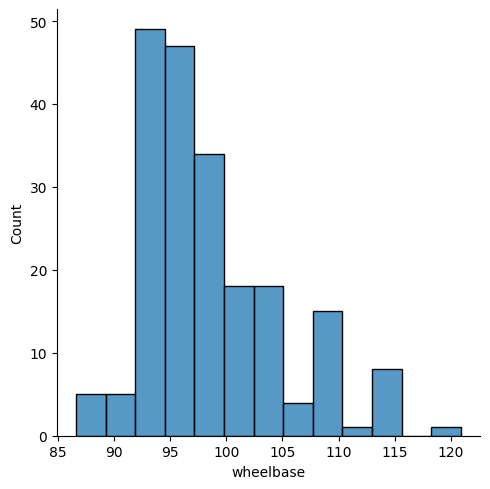

In [ ]:
# wheelbase: distance between centre of front and rarewheels
sns.displot(cars['wheelbase'])
plt.show()

In [ ]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

In [ ]:
# stroke: volume of the engine (the distance traveled by the
# piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

In [ ]:
# compression ration: ration of volume of compression chamber
# at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

In [ ]:
# target variable: price of car
sns.distplot(cars['price'])
plt.show()

In [ ]:
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.info()

In [ ]:
# dropping symboling and car_ID
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

In [ ]:
# correlation matrix
cor = cars_numeric.corr()
cor

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# CarName: first few entries
#cars['CarName'][:30]
cars.CarName[:30]

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
5,audi fox
6,audi 100ls
7,audi 5000
8,audi 4000
9,audi 5000s (diesel)


In [ ]:
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

,CarName
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
5,audi
6,audi
7,audi
8,audi
9,audi


In [ ]:
# New column car_company
#cars['car_company'] = cars['CarName'].apply(lambda x: x.split(" ")[0])
cars['car_company'] = carnames
cars.head()

In [ ]:
# look at all values
cars['car_company'].astype('category').value_counts()

,count
car_company,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
volvo,11
peugeot,11
dodge,9


In [ ]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") |
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [ ]:
cars['car_company'].astype('category').value_counts()

In [ ]:
# drop carname variable
cars = cars.drop('CarName', axis=1)

In [ ]:
cars.info()

In [ ]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

In [ ]:
#X = X.drop("stroke", axis=1)  do this only if you want to increase the accuracy

In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

In [ ]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

In [ ]:
# drop categorical variables
X = X.drop(list(cars_categorical.columns), axis=1)


In [ ]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [ ]:
X

In [ ]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

NameError: name 'X' is not defined

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [ ]:
# Building the first model with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

In [ ]:
lm.score(X_train,y_train)

In [ ]:
lm.score(X_test,y_test)

In [ ]:
# predict
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

In [ ]:
len(X_train2)

In [ ]:
nlm = LinearRegression()

In [ ]:
nlm.fit(X_train2, y_train)

In [ ]:
y_pred1 = nlm.predict(X_test2)

In [ ]:
print(nlm.score(X_train2, y_train))

print(r2_score(y_true=y_test, y_pred=y_pred1))

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
def select_features(X_train, y_train, X_test):

 fs = SelectKBest(score_func=f_regression, k='all')

 fs.fit(X_train, y_train)

 X_train_fs = fs.transform(X_train)

 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:

def select_features(X_train, y_train, X_test):

 fs = SelectKBest(score_func=mutual_info_regression, k='all')

 fs.fit(X_train, y_train)

 X_train_fs = fs.transform(X_train)

 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
def select_features(X_train, y_train, X_test):

 fs = SelectKBest(score_func=f_regression, k=30)

 fs.fit(X_train, y_train)

 X_train_fs = fs.transform(X_train)

 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

model = LinearRegression()
model.fit(X_train_fs, y_train)

yhat = model.predict(X_test_fs)

print(r2_score(y_true=y_test, y_pred=yhat))



In [ ]:
def select_features(X_train, y_train, X_test):

 fs = SelectKBest(score_func=mutual_info_regression, k=30)

 fs.fit(X_train, y_train)

 X_train_fs = fs.transform(X_train)

 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

model = LinearRegression()
model.fit(X_train_fs, y_train)

yhat = model.predict(X_test_fs)

print(r2_score(y_true=y_test, y_pred=yhat))